In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
media = pd.read_csv("mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [3]:
media.drop(['Unnamed: 7'], axis = 1, inplace = True)
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [4]:
#converting Date column to DateTime format
media['Date'] = pd.to_datetime(media['Date'])

In [5]:
media['Days'] = media['Date'] - media['Date'].min()

In [6]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,0 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,1 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,2 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,3 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,4 days


In [7]:
media['Days'] = media['Days'] + pd.Timedelta(days = 1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [8]:
media['Days'] = media['Days'].astype(str)
media['Days'] = media['Days'].str.split(expand = True)[0]

media['Days'] = media['Days'].astype(int)
media.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
Days                            int32
dtype: object

In [9]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


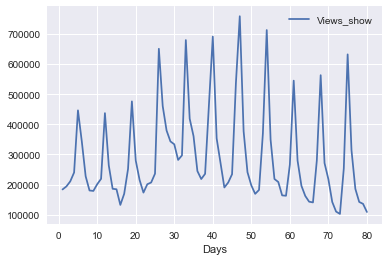

In [10]:
media.plot.line(x = 'Days', y= 'Views_show')

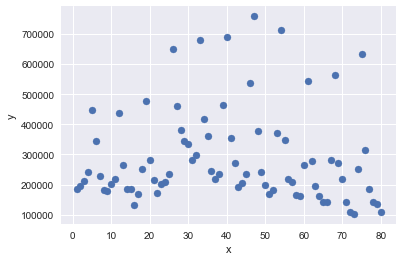

In [11]:
plt.scatter(media.Days, media.Views_show, alpha=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

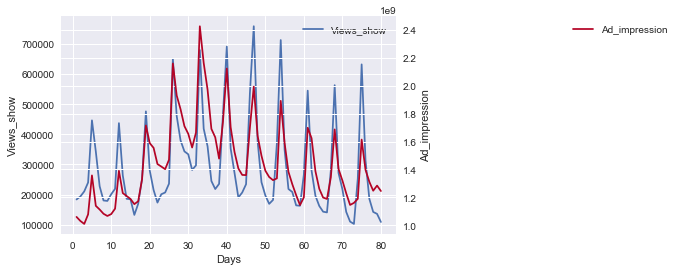

In [12]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

media.plot(x = 'Days', y= 'Views_show', kind = 'line', ax = ax1, legend = True)
media.plot(x = 'Days', y= 'Ad_impression', kind = 'line', ax = ax2, colormap = 'coolwarm_r')

ax1.set_ylabel("Views_show")
ax2.set_ylabel("Ad_impression")
plt.legend(bbox_to_anchor=(1.5, 1), loc="upper left")

In [13]:
#Monday =  and Sunday = 6
media['day_of_week'] = media['Date'].dt.dayofweek

In [15]:
#creating a weekend column; converting 5 and 6 to 0 and everything else to 1
media['weekend'] = np.where((media['day_of_week'] == 6) | (media['day_of_week'] == 5), 1, 0)

In [17]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,day_of_week,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,1


### Let's build our model

In [18]:
import statsmodels.api as sm

#### Running first model (lm1) day_of_week & visitors 

In [19]:
# Putting feature variable to X
X = media[['Visitors','day_of_week']]

# Putting response variable to y
y = media['Views_show']

In [20]:
X = sm.add_constant(X)

#fitting the model using 2 feature variables
lm1 = sm.OLS(y, X).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     21.44
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           3.98e-08
Time:                        20:09:47   Log-Likelihood:                -1051.4
No. Observations:                  80   AIC:                             2109.
Df Residuals:                      77   BIC:                             2116.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.927e+05   1.05e+05     -2.778      

#### Running second model (lm2) weekend & visitors 

In [21]:
# Putting feature variable to X
X = media[['Visitors', 'weekend']]

# Putting response variable to y
y = media['Views_show']

In [22]:
X = sm.add_constant(X)

#fitting the model using 2 feature variables
lm2 = sm.OLS(y, X).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           2.51e-12
Time:                        20:16:41   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

Our model has improved significantly with weekend column

#### Running third model (lm3) weekend, visitors and Character_A

In [24]:
# Putting feature variable to X
X = media[['Visitors', 'weekend', 'Character_A']]

# Putting response variable to y
y = media['Views_show']

In [25]:
X = sm.add_constant(X)

#fitting the model using 2 feature variables
lm3 = sm.OLS(y, X).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           1.53e-14
Time:                        20:21:40   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [29]:
#creating lag variable
media['Lag_views'] = np.roll(media['Views_show'], shift = 1)
media['Lag_views'].replace(108961, 0, inplace = True)

In [30]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,day_of_week,weekend,Lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,1,240061


#### Running fourth model (lm4) visitors, Character_A, Lag_views & weekend

In [38]:
# Putting feature variable to X
X = media[['Visitors','Character_A','Lag_views','weekend']]

# Putting response variable to y
y = media['Views_show']

In [39]:
X = sm.add_constant(X)

#fitting the model using 2 feature variables
lm4 = sm.OLS(y, X).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           3.16e-21
Time:                        20:32:01   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

Visitors have become insignificant with a p-value = 0.167

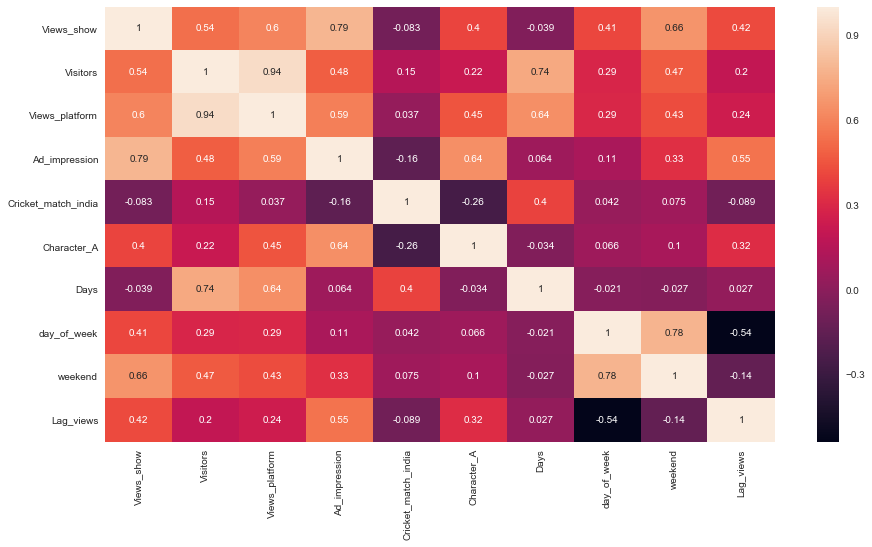

In [40]:
plt.figure(figsize = (15,8))        # Size of the figure
sns.heatmap(media.corr(),annot = True)

#### Running fifth model (lm5) Character_A, weekend & Views_platform

In [41]:
# Putting feature variable to X
X = media[['weekend','Character_A','Views_platform']]

# Putting response variable to y
y = media['Views_show']

In [42]:
X = sm.add_constant(X)

#fitting the model using 2 feature variables
lm5 = sm.OLS(y, X).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           3.59e-15
Time:                        20:33:06   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

Views_platform cannot be directly controlled by the advertising spends but Visitors are a direct impact of advertising spends. Hence it is better to include Visitors in the model

#### Running sixth model (lm6) Character_A, weekend & Visitors

In [43]:
# Putting feature variable to X
X = media[['weekend','Character_A','Visitors']]

# Putting response variable to y
y = media['Views_show']

In [44]:
X = sm.add_constant(X)

#fitting the model using 2 feature variables
lm5 = sm.OLS(y, X).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           1.53e-14
Time:                        20:34:47   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

#### Running seventh model (lm7) Character_A, weekend, Visitors & Ad_impressions

In [46]:
# Putting feature variable to X
X = media[['weekend','Character_A','Visitors','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

In [47]:
X = sm.add_constant(X)

#fitting the model using 2 feature variables
lm5 = sm.OLS(y, X).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           1.10e-25
Time:                        20:41:47   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

Character_A has changed its sign and Visitors has become insinificant

#### Running eight model (lm8) Character_A, weekend & Ad_impressions

In [48]:
# Putting feature variable to X
X = media[['weekend','Character_A','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

In [49]:
X = sm.add_constant(X)

#fitting the model using 2 feature variables
lm5 = sm.OLS(y, X).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           1.05e-26
Time:                        20:44:35   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [50]:
#Ad impression in million
media['ad_impression_million'] = media['Ad_impression']/1000000